In [1]:
import pandas as pd

df = pd.read_csv("../data/raw_analyst_ratings.csv")  
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [2]:
df['headline_length'] = df['headline'].apply(len)
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

<Axes: ylabel='publisher'>

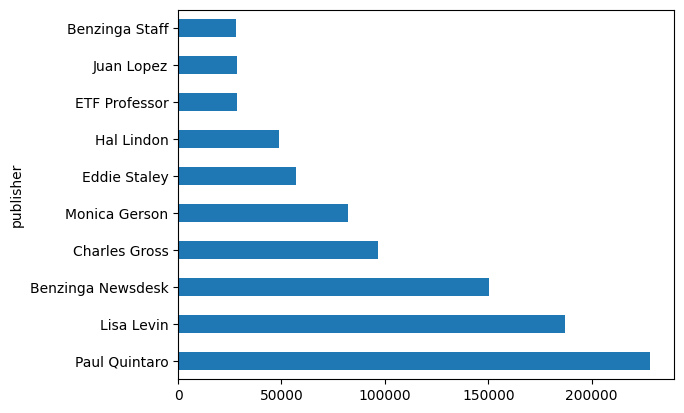

In [3]:
df['publisher'].value_counts().head(10).plot(kind='barh')


1351341 invalid dates found


<Axes: title={'center': 'Articles per Day'}, xlabel='date'>

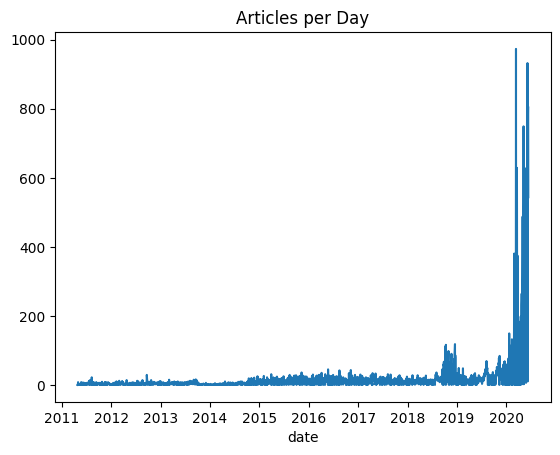

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print(df['date'].isna().sum(), "invalid dates found")

df['date'].dt.date.value_counts().sort_index().plot(title="Articles per Day")


In [6]:
df['publisher'].nunique()


1034

In [7]:
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
df['domain'].value_counts().head()


domain
benzinga.com      7937
gmail.com          139
andyswan.com         5
investdiva.com       2
tothetick.com        2
Name: count, dtype: int64

In [8]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df['headline'].dropna())
words = vectorizer.get_feature_names_out()

import numpy as np
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebika\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('vs', np.int64(162099)),
 ('stocks', np.int64(161776)),
 ('est', np.int64(140604)),
 ('eps', np.int64(128897)),
 ('market', np.int64(120558)),
 ('shares', np.int64(114313)),
 ('reports', np.int64(108710)),
 ('update', np.int64(91723)),
 ('earnings', np.int64(87399)),
 ('sales', np.int64(79645))]

<Axes: title={'center': 'News Frequency by Hour'}, xlabel='hour'>

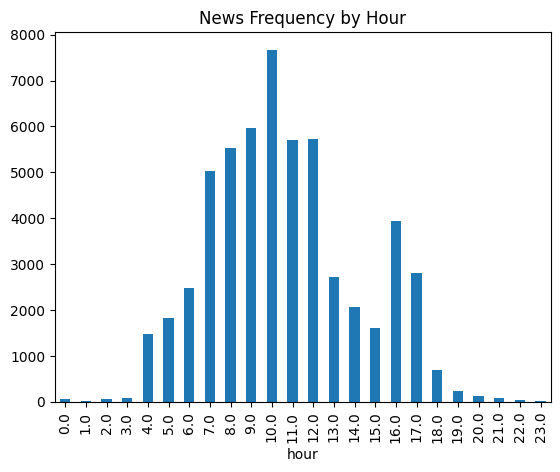

In [9]:
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar', title="News Frequency by Hour")
